In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as hc
import scipy.spatial.distance as sd
import pylab as pl
#import simplemapplot

%pylab inline

import scipy.stats as ss
import sklearn.svm as svm

Populating the interactive namespace from numpy and matplotlib


In [3]:
white_ds = pd.read_csv("white.csv", sep=";")
red_ds = pd.read_csv("red.csv", sep=";")

wine_ds = pd.concat([white_ds, red_ds])
good_ds = wine_ds[wine_ds["quality"] >= 8]
bad_ds = wine_ds[wine_ds["quality"] <= 4]

def shuffle(df):
    index = list(df.index)
    random.shuffle(index)
    df = df.ix[index]
    df.reset_index()
    return df

In [22]:
good_ds["alcohol"].tail(5)

1202    11.7
1269    14.0
1403    10.0
1449    11.3
1549    11.4
Name: alcohol, dtype: float64

In [23]:
bad_ds["alcohol"].tail(5)

1480    10.10
1482    10.30
1484    10.90
1505     9.95
1521     9.05
Name: alcohol, dtype: float64

In [24]:
good_ds.shape[0] + bad_ds.shape[0]

444

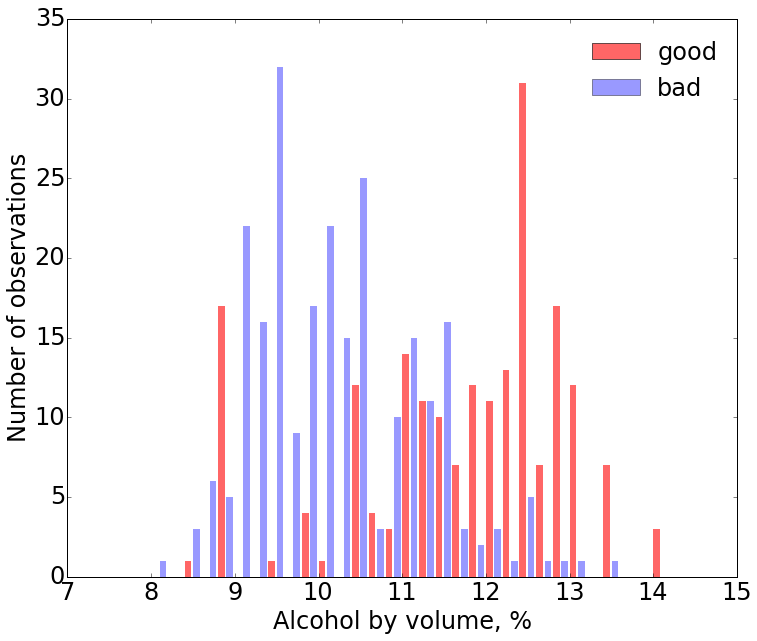

In [18]:
good_count, bins = np.histogram(good_ds["alcohol"], bins=50, range=(5, 15))
bad_count, bins = np.histogram(bad_ds["alcohol"], bins=50, range=(5, 15))
#red_counts, bins = np.histogram(red_ds["alcohol"], bins=100, range=(5, 15))

pl.figure(figsize=(12, 10))
pl.bar(bins[:-1], good_count, (bins[1]-bins[0])*0.4, color="red", alpha=0.6, label="good", ec="none")
pl.bar(bins[:-1] + (bins[1]-bins[0])*0.5, bad_count, (bins[1]-bins[0])*0.4, color="blue", alpha=0.4, label="bad", ec="none")
pl.xlim(7, 15)
pl.xlabel("Alcohol by volume, %", fontsize=24)
pl.ylabel("Number of observations", fontsize=24)
pl.tick_params(axis='both', which='major', labelsize=24)
pl.legend(prop={'size' wine: 24}, frameon=False)
pl.show()

m_r=11.7 sigma_r=1.3
m_a=10.2 sigma_a=1.0


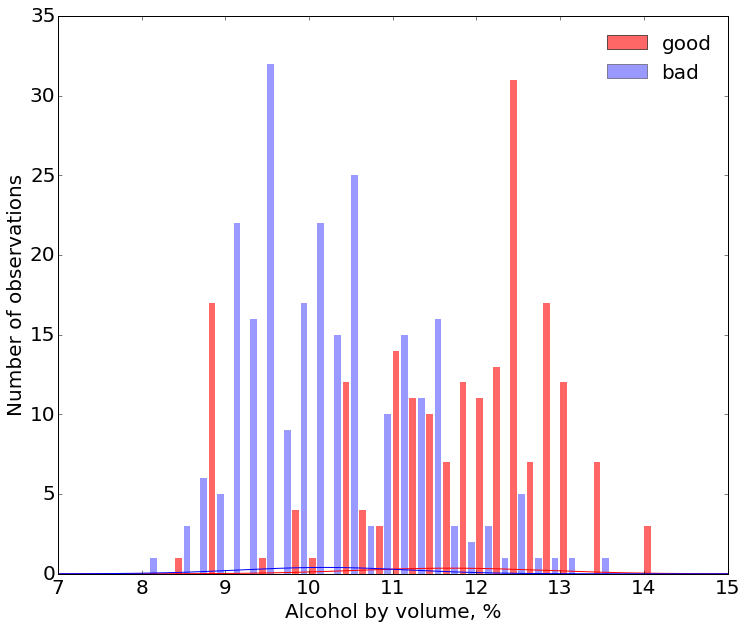

In [12]:
m1, s1 = ss.norm.fit(good_ds["alcohol"])
m0, s0 = ss.norm.fit(bad_ds["alcohol"])
print "m_r=%.1f sigma_r=%.1f" % (m1, s1)
print "m_a=%.1f sigma_a=%.1f" % (m0, s0)

def plot_gauss(mean, variance, m, M, c):
    x = np.linspace(m, M, 1000)
    pl.plot(x,mlab.normpdf(x, mean, math.sqrt(variance)), color=c)    

pl.figure(figsize=(12, 10))
pl.bar(bins[:-1], good_count, (bins[1]-bins[0])*0.4, color="red", alpha=0.6, label="good", ec="none")
pl.bar(bins[:-1] + (bins[1]-bins[0])*0.5, bad_count, (bins[1]-bins[0])*0.4, color="blue", alpha=0.4, label="bad", ec="none")
plot_gauss(m1, s1, 7, 15, "red")
plot_gauss(m0, s0, 7, 15, "blue")
pl.xlim(7, 15)
pl.xlabel("Alcohol by volume, %", fontsize=20)
pl.ylabel("Number of observations", fontsize=20)
pl.tick_params(axis='both', which='major', labelsize=20)
pl.legend(prop={'size':20}, frameon=False)
pl.show()

In [8]:
x = np.zeros((good_ds.shape[0] + bad_ds.shape[0], 1))
x[:good_ds.shape[0], 0] = good_ds["alcohol"]
x[good_ds.shape[0]:, 0] = bad_ds["alcohol"]

y = np.zeros(good_ds.shape[0] + bad_ds.shape[0])
y[:good_ds.shape[0]] = 1

svc = svm.SVC(kernel='linear', C=1)
svc.fit(x, y)
print svc.intercept_
print svc.coef_
print - svc.intercept_ / svc.coef_

[-9.78274867]
[[ 0.86957929]]
[[ 11.24997889]]


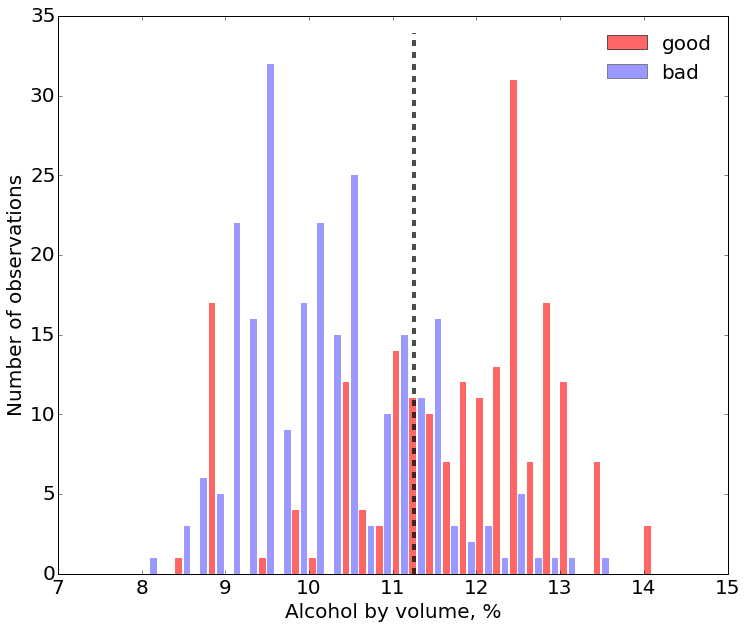

In [9]:
pl.figure(figsize=(12, 10))
pl.bar(bins[:-1], good_count, (bins[1]-bins[0])*0.4, color="red", alpha=0.6, label="good", ec="none")
pl.bar(bins[:-1] + (bins[1]-bins[0])*0.5, bad_count, (bins[1]-bins[0])*0.4, color="blue", alpha=0.4, label="bad", ec="none")
pl.xlim(7, 15)
pl.xlabel("Alcohol by volume, %", fontsize=20)
pl.ylabel("Number of observations", fontsize=20)
pl.tick_params(axis='both', which='major', labelsize=20)
pl.legend(prop={'size':20}, frameon=False)
pl.axvline(- svc.intercept_ / svc.coef_, 0, 0.97, color="black", lw=4, ls="--", alpha=0.7)
pl.show()